In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import csv
import pandas as pd

In [2]:
# IMPORTACIÓN SOLUCIÓN
# BASE =
# IDEAL = 
# ESPERADO = 

# BASE_MODIFICADO = 
# IDEAL_MODIFICADO = 
# ESPERADO_MODIFICADO = 


with open('resultados_algoritmo_domingo.csv') as file:
    csv_reader = csv.reader(file, delimiter=';')
    iteraciones = list()
    min_algoritmo = list()
    mean_algoritmo = list()
    max_algoritmo = list()
    best_algoritmo = list()
    generacion_algoritmo = list()

    header = next(csv_reader) # Para que no se considere en el loop
    for linea in csv_reader:
        iteraciones.append(int(linea[0]))
        best_algoritmo.append(linea[4])

        if linea[4] == '0':
            min_algoritmo.append(min_algoritmo[-1])
            mean_algoritmo.append(mean_algoritmo[-1])
            max_algoritmo.append(max_algoritmo[-1])
            generacion_algoritmo.append(generacion_algoritmo[-1])
            
        else:
            min_algoritmo.append(float(linea[1]))
            mean_algoritmo.append(float(linea[2]))
            max_algoritmo.append(float(linea[3]))
            generacion_algoritmo.append(linea[5])

print(iteraciones)
print(min_algoritmo)
print(mean_algoritmo)
print(max_algoritmo)
print(best_algoritmo)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[297.0999416892863, 822.9907704324025, 822.9907704324025, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 815.4110071169359, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.0546309615574, 257.054630

## Formato soluciones
Para poder analizar los resultados trabajaremos con varios vectores con distintas soluciones según los datos iniciales.

El formato de los vectores solución consiste en un array con los siguientes datoses el siguiente:

| Indice | Valor | Rango |
|--------|-------|-------
| 0 | x = Cantidad de puestos de atención | 3-5  | 
| 1 | y = Cantidad de boxes de atención | 5-8  |
| 2 | z1= Cantidad de camas en la sala DIV101_603 |  12-15 |
| 3 | z2= Cantidad de camas en las sala DIV101_604 | 5-6 |
| 4 | z3 = Cantidad de camas en las sala DIV101_703 | 5-8|
| 5 | z4 = Cantidad de camas en las sala DIV102_203 | 12-15 |
| 6 | z5 = Cantidad de camas en las sala DIV103_107 | 8-10 |
| 7 | z6 = Cantidad de camas en las sala DIV103_204 | 10-13 |
| 8 | z7 = Cantidad de camas en las sala DIV104_602 |14-18 |
| 9 | e = Disponibilida de la sala OPR101_011  | 0-1 |



In [3]:
costos_operacionales = {
    'puesto_antencion': 150000, 
    'box_atencion': 450000,
    'cama': 250000,
    'horario_OPR101_011': 800000}

costos_inversion = {
    'box_atencion': 12500000,
    'cama': 3500000,
    'horario_OPR101_011': 25000000
}

# ¿Análisis estacionario? (no toy seguro del nombre)

In [3]:
df_resultados_algoritmo_1 = pd.DataFrame(list(zip(iteraciones, min_algoritmo, mean_algoritmo, max_algoritmo)),
               columns =['Iteracion', 'Min', 'Mean', 'Max'])

df_resultados_algoritmo_1['Min_0_presupuesto'] = 1231.902265331893
df_resultados_algoritmo_1['Max_0_presupuesto'] = 3385.8509100386877
df_resultados_algoritmo_1['Min_Infinito_presupuesto'] = 248.24500807954746
df_resultados_algoritmo_1['Max_Infinito_presupuesto'] = 447.2317648842544

fig = go.Figure()

fig.update_layout(title = 'Resultados Algoritmo Genético')
fig.update_xaxes(title_text="N° Iteraciones")
fig.update_yaxes(title_text="Lead Time [horas]")


fig.add_trace(go.Scatter(x=df_resultados_algoritmo_1["Iteracion"], y=df_resultados_algoritmo_1["Min"],
                    mode='lines',
                    name='Con presupuesto_min', marker=dict(color='dodgerblue',size=20)))
fig.add_trace(go.Scatter(x=df_resultados_algoritmo_1["Iteracion"], y=df_resultados_algoritmo_1["Max"],
                    mode='lines',
                    name='Con presupuesto_max', marker=dict(color='dodgerblue',size=20)))


#fig.add_trace(go.Scatter(x=df_resultados_algoritmo_1["Iteracion"], y=df_resultados_algoritmo_1["Min_0_presupuesto"],
#                    mode='lines',
#                    name='Sin presupuesto_min', marker=dict(color='darkgrey',size=20)))
#fig.add_trace(go.Scatter(x=df_resultados_algoritmo_1["Iteracion"], y=df_resultados_algoritmo_1["Max_0_presupuesto"],
#                    mode='lines', name='Sin presupuesto_max', marker=dict(color='darkgrey',size=20)))


fig.add_trace(go.Scatter(x=df_resultados_algoritmo_1["Iteracion"], y=df_resultados_algoritmo_1["Max_Infinito_presupuesto"],
                    mode='lines', name='Infinito presupuesto_max', marker=dict(color='green',size=20)))
fig.add_trace(go.Scatter(x=df_resultados_algoritmo_1["Iteracion"], y=df_resultados_algoritmo_1["Min_Infinito_presupuesto"],
                    mode='lines',
                    name='Infinito presupuesto_min', marker=dict(color='green',size=20)))


fig.show()





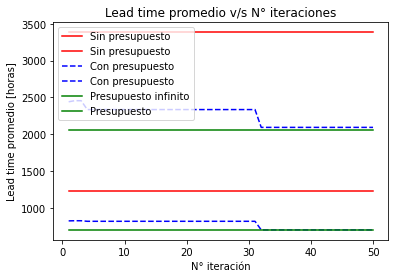

In [7]:
lista_lead_time_max = max_algoritmo
lista_lead_time_min = min_algoritmo
lead_time_promedio_sin_presupuesto_max = 3385.8509100386877
lead_time_promedio_sin_presupuesto_min = 1231.902265331893
lead_time_promedio_max_presupuesto_max = 2051.8472240894216
lead_time_promedio_max_presupuesto_min = 701.148734801536
#

lista_sin_presupuesto_max = np.resize([lead_time_promedio_sin_presupuesto_max], len(lista_lead_time_max))
lista_sin_presupuesto_min = np.resize([lead_time_promedio_sin_presupuesto_min], len(lista_lead_time_max))
lista_max_presupuesto_max = np.resize([lead_time_promedio_max_presupuesto_max], len(lista_lead_time_max))
lista_max_presupuesto_min = np.resize([lead_time_promedio_max_presupuesto_min], len(lista_lead_time_max))
iteraciones = range(1, len(lista_lead_time_max) + 1)

plt.plot(iteraciones, lista_sin_presupuesto_max, linestyle="-", label='Sin presupuesto', color='r')
plt.plot(iteraciones, lista_sin_presupuesto_min, linestyle="-", label='Sin presupuesto', color='r')
plt.plot(iteraciones, lista_lead_time_max, linestyle="--", label='Con presupuesto', color='blue')
plt.plot(iteraciones, lista_lead_time_min, linestyle="--", label='Con presupuesto', color='blue')
plt.plot(iteraciones, lista_max_presupuesto_max, linestyle="-", label='Presupuesto infinito', color='g')
plt.plot(iteraciones, lista_max_presupuesto_min, linestyle="-", label='Presupuesto', color='g')


plt.xlabel('N° iteración')
plt.ylabel('Lead time promedio [horas]')
plt.title('Lead time promedio v/s N° iteraciones')
plt.legend(loc='upper left')

#plt.yticks([lista_lead_time_promedio[0] , lista_lead_time_promedio[-1], lista_lead_time_max[-1]])
#ax = plt.gca()
#ax.invert_yaxis()
plt.show()

# Escenarios
Se procede a comparar los resultados de distintas soluciones 

### Escenario base
* Llegada de pacientes: “registro histórico”
* Ruta de pacientes: “registro histórico”
* Presupuesto: 0

In [4]:
#lead_time_base = 
base = np.array([3, 5, 12, 5, 5, 12, 8, 10, 14, 0])
lead_time_base_range = (200, 300)

### Escenario Ideal
* Llegada de pacientes: “registro histórico”
* Ruta de pacientes: “registro histórico”
* Presupuesto: infinito

In [5]:
# lead_time_ideal =
ideal = np.array([5, 8, 15, 6, 8, 15, 10, 13, 18, 1])
lead_time_ideal_range = (50, 100)

### Escenario Esperado
* Llegada de pacientes: “registro histórico”
* Ruta de pacientes: “registro histórico”
* Presupuesto: propuesto por equipo docente


In [6]:
# lead_time_esperado = 
esperado = np.array([5, 8, 12, 6, 2, 12, 10, 10, 15, 0]) # Inventado para testear
lead_time_esperado_range = (100, 200)

## Análisis inicial

In [7]:
def calcular_costos(base, solucion, costos_op, costos_inv):
    costo_op = 0
    costo_inv = 0
    costo_op += (solucion[0] - base[0]) * costos_op['puesto_antencion']
    costo_op += (solucion[1] - base[1])* costos_op['box_atencion']
    costo_inv += (solucion[1] - base[1])* costos_inv['box_atencion']
    for i in range(2,9):
        costo_op += (solucion[i] - base[i])* costos_op['cama']
        costo_inv += (solucion[i] - base[i])* costos_inv['cama']
    
    costo_op += solucion[9] * costos_op['horario_OPR101_011']
    costo_inv += solucion[9]* costos_inv['horario_OPR101_011']
    return costo_op, costo_inv

In [8]:
print(calcular_costos(base, ideal, costos_operacionales, costos_inversion))
print(calcular_costos(base, esperado, costos_operacionales, costos_inversion))

(7200000, 129000000)
(1900000, 41000000)


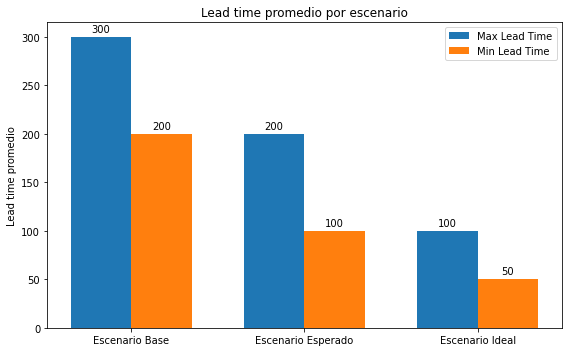

In [9]:
labels = ['Escenario Base', 'Escenario Esperado', 'Escenario Ideal']
max_leadtime = [lead_time_base_range[1], 
                lead_time_esperado_range[1], 
                lead_time_ideal_range[1]]

min_leadtime = [lead_time_base_range[0], 
                lead_time_esperado_range[0], 
                lead_time_ideal_range[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, max_leadtime, width, label='Max Lead Time')
rects2 = ax.bar(x + width/2, min_leadtime, width, label='Min Lead Time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Lead time promedio')
ax.set_title('Lead time promedio por escenario')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [10]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=labels,
                       open=min_leadtime, high=max_leadtime,
                       low=min_leadtime, close=max_leadtime)])

fig.update_layout(title = "Rangos Lead Time promedio según escenario")
fig.update_xaxes(title_text='Escenario')
fig.update_yaxes(title_text='Lead time promedio')
fig.show()

ModuleNotFoundError: No module named 'plotly'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


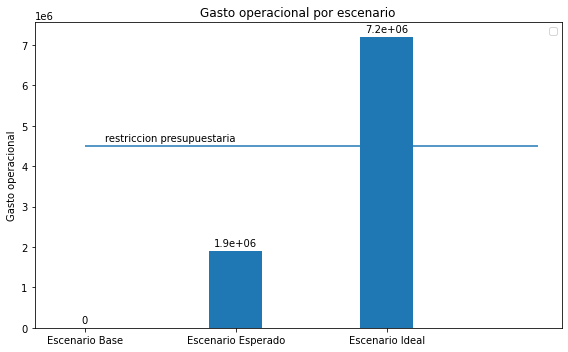

In [ ]:
labels = ['Escenario Base', 'Escenario Esperado', 'Escenario Ideal']

op_base = calcular_costos(base, base, costos_operacionales, costos_inversion)[0]
op_ideal = calcular_costos(base, ideal, costos_operacionales, costos_inversion)[0]
op_esperado = calcular_costos(base, esperado, costos_operacionales, costos_inversion)[0]

max_leadtime = [op_base, op_esperado, op_ideal]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x, max_leadtime, width, label='')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gasto operacional')
ax.set_title('Gasto operacional por escenario')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
plt.hlines(4500000, xmin=0, xmax=3, label='Restricción')
plt.text(1, 4700000, 'restriccion presupuestaria', ha='right', va='center')

fig.tight_layout()

plt.show()

### Escenario base - Sensibilidad de llegada de pacientes
* Llegada de pacientes: “registro histórico” + valor por determinar
* Ruta de pacientes: “registro histórico”
* Presupuesto: 0


### Escenario Ideal - Sensibilidad de llegada de pacientes
* Llegada de pacientes: “registro histórico” + valor por determinar
* Ruta de pacientes: “registro histórico”
* Presupuesto: Infinito


### Escenario Esperado - Sensibilidad de llegada de pacientes
* Llegada de pacientes: “registro histórico” + valor por determinar
* Ruta de pacientes: “registro histórico”
* Presupuesto: propuesto por equipo docente
